In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

fake.csv



In [2]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

all_news = pd.read_csv("../input/fake.csv")
all_news.head(5)

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,25689.0,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,25689.0,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias


In [3]:
print("Types and counts of stories", all_news.groupby(["type"]).size())


Types and counts of stories type
bias            443
bs            11492
conspiracy      430
fake             19
hate            246
junksci         102
satire          146
state           121
dtype: int64


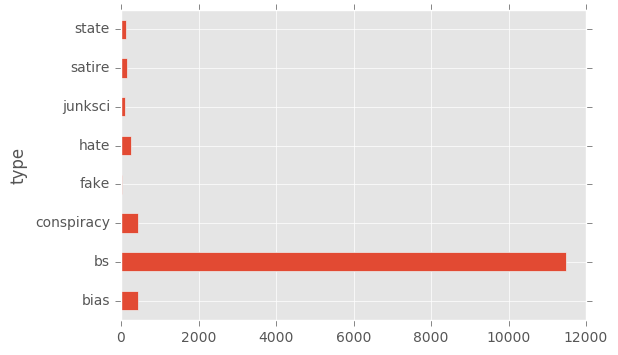

In [4]:
all_news.groupby(['type']).size().plot(kind='barh')

In [5]:
fake_news = all_news[all_news["type"] == "fake"]

In [6]:
import nltk

# Fill any blank fields
fake_news.title.fillna("", inplace=True)
fake_news.text.fillna("", inplace=True)

# Join the title and text
all_text = fake_news.title.str.cat(fake_news.text, sep=' ')

# Tokenize. The NLTK tokenizer isn't awesome. Spacy has a nice one, but I don't think it is installed
words = nltk.word_tokenize(" ".join(all_text.tolist()))

/opt/conda/lib/python3.5/site-packages/pandas/core/generic.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [7]:
fake_news.head(20)

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
57,8a35883f9c9f0b15a9e20ab8711d403d91d57405,0,Jimmy Rustling,2016-10-27T13:00:00.000+03:00,The Amish In America Commit Their Vote To Dona...,18 SHARE The Amish in America have committed t...,english,2016-10-27T15:50:22.818+03:00,abcnews.com.co,CO,65078.0,The Amish In America Commit Their Vote To Dona...,0.000,http://abcnews.com.co/wp-content/uploads/2016/...,0,0,0,0,0,fake
58,c6fb8dae30e3d378935e910540a0cb99b5351ac0,0,Jimmy Rustling,2016-11-11T12:00:00.000+02:00,Obama Signs Executive Order Declaring Investig...,64 SHARE President Obama has signed an Executi...,english,2016-11-11T16:33:32.484+02:00,abcnews.com.co,US,65078.0,Obama Signs Executive Order Declaring Investig...,0.009,http://abcnews.com.co/wp-content/uploads/2016/...,0,0,0,0,0,fake
379,504e8fa4469d75f8d22984220568e3313c74a1b7,0,"Day of the Dead 2015: History, food and reflec...",2016-10-27T05:18:00.000+03:00,Comment on HALLOWEEN IN THE CASTRO RETURNS IN ...,"adobochron 10 Comments \nSan Francisco, Califo...",english,2016-10-27T07:25:28.782+03:00,adobochronicles.com,US,NaN,Comment on HALLOWEEN IN THE CASTRO RETURNS IN ...,0.000,https://adobochroniclesdotcom.files.wordpress....,0,1,0,0,0,fake
380,20e1a45f760f8db5f26207bbfe827bf8cd6d65bb,0,Ivan Jose,2016-10-27T09:18:46.193+03:00,Comment on Tutorial: Riding The Philippine Jee...,"adobochron 1 Comment \nMANILA, Philippines (Th...",english,2016-10-27T09:18:46.193+03:00,adobochronicles.com,US,NaN,Comment on Tutorial: Riding The Philippine Jee...,0.000,https://adobochroniclesdotcom.files.wordpress....,0,1,0,0,0,fake
381,9874fcff14d4af3c13954116c55590b28a5b98b8,0,Tony Rabon,2016-10-28T19:56:09.149+03:00,Comment on What White House Executive Chef Com...,"adobochron 1 Comment Comerford \nWASHINGTON, D...",english,2016-10-28T19:56:09.149+03:00,adobochronicles.com,US,NaN,Comment on What White House Executive Chef Com...,0.000,https://adobochroniclesdotcom.files.wordpress....,0,1,0,0,0,fake
382,3b136392b55de72123d5b03a3d07e575119e944d,0,Shirley Barnett,2016-11-02T22:41:00.000+02:00,Comment on Philippines Voids Building Permit O...,adobochron 7 Comments A rendering of the Trump...,english,2016-11-03T21:38:32.268+02:00,adobochronicles.com,US,NaN,Comment on Philippines Voids Building Permit O...,0.000,https://adobochroniclesdotcom.files.wordpress....,0,1,0,0,0,fake
383,6cc3f4a496a8124a3832867e74a1a26a9ae43232,0,برنامه ریزی ضمیر ناخوداگاه,2016-11-04T22:17:00.000+02:00,Comment on Hillary Clinton Campaign Logo Has A...,"adobochron 1 Comment \nSAN FRANCISCO, Californ...",english,2016-11-05T20:52:38.316+02:00,adobochronicles.com,US,NaN,Comment on Hillary Clinton Campaign Logo Has A...,0.000,https://adobochroniclesdotcom.files.wordpress....,0,1,0,0,0,fake
384,d6cf2ee2ebc9b55ec8385b0a20f9417cbd9f63a9,0,adobochron,2016-11-06T23:48:58.529+02:00,Comment on Philippine Government To ‘Take Back...,"adobochron 2 Comments \nMANILA, Philippines ( ...",english,2016-11-06T23:48:58.529+02:00,adobochronicles.com,US,NaN,Comment on Philippine Government To ‘Take Back...,0.000,https://adobochroniclesdotcom.files.wordpress....,0,1,0,0,0,fake
385,a0ec7a8f22b44b92bea5c01a45c70e30b17384b4,0,Rebecca Bennett,2016-11-12T00:27:00.000+02:00,"Comment on If Elected President, Donald Trump ...",adobochron 2 Comments The Trump hotels in Las ...,english,2016-11-12T01:24:50.353+02:00,adobochronicles.com,US,NaN,"Comment on If Elected President, Donald Trump ...",0.000,https://adobochroniclesdotcom.files.wordpress....,0,1,0,0,0,fake
386,c545a56e757eeb80748da7f585752084b8d73c3f,0,Eligio Abellera,2016-11-15T18:56:14.861+02:00,Comment on WHITE HOUSE EXECUTIVE CHEF REVEALS ...,"adobochron 3 Comments Comerford \nWashington, ...",english,2016-11-15T18:56:14.861+02:00,adobochronicles.com,US,NaN,Comment on WHITE HOUSE EXECUTIVE CHEF REVEALS ...,0.000,https://adobochroniclesdotcom.files.wordpre

In [8]:
from nltk.corpus import stopwords
import string

# clearly more cleaning is needed here, but really I should get a better tokenizer
stop = stopwords.words('english') 
cleanwords = [i for i in words if i not in stop and i.isalpha() and len(i) > 2]

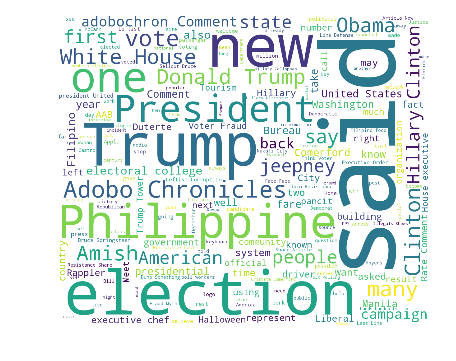

In [9]:
from wordcloud import WordCloud, STOPWORDS

wordcloud2 = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          width=1200,
                          height=1000
                         ).generate(" ".join(cleanwords))


plt.imshow(wordcloud2)
plt.axis('off')
plt.show()

In [10]:
# Bigrams should be more interesting

bigrams = nltk.bigrams(cleanwords)

In [11]:
# look at the most common. 

from collections import Counter

counter = Counter(bigrams)
print(counter.most_common(10))

[(('Adobo', 'Chronicles'), 20), (('The', 'Adobo'), 20), (('Donald', 'Trump'), 16), (('White', 'House'), 15), (('Hillary', 'Clinton'), 11), (('electoral', 'college'), 10), (('United', 'States'), 9), (('The', 'Resistance'), 8), (('Rate', 'Comment'), 7), (('adobochron', 'Comment'), 6)]


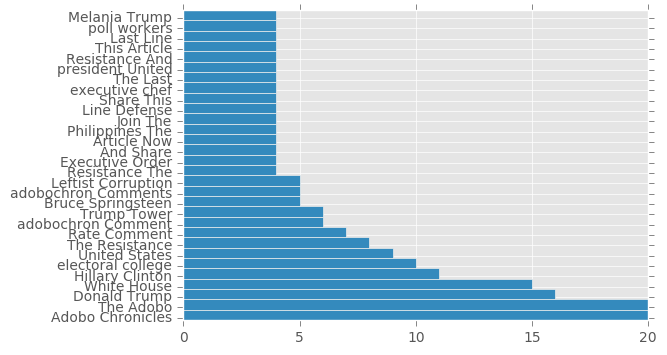

In [12]:
num_to_show = 30

labels = [" ".join(e[0]) for e in counter.most_common(num_to_show)]
values = [e[1] for e in counter.most_common(num_to_show)]

indexes = np.arange(len(labels))
width = 1

#plt.bar(indexes, values, width)
#plt.xticks(indexes + width * 0.5, labels, rotation=90)

plt.barh(indexes, values, width)
plt.yticks(indexes + width * 0.2, labels)
plt.show()